# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [626]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import tweepy
from io import StringIO
import json
from tqdm import tqdm


In [627]:
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv') # read in the data

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [628]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
data = response.text
image_pred = pd.read_csv(StringIO(data), sep='\t')
image_pred.to_csv('image_predictions.tsv')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [629]:
from dotenv import load_dotenv
load_dotenv()

bearer_token = os.environ.get('BEARER_TOKEN')

tweet_id = list(tweet_archive['tweet_id'])
missing_tweets = []

In [630]:
# if not os.path.exists('tweet_json.txt'):
#     with open('tweet_json.txt', 'w'): pass
# def get_tweet():
#     auth = tweepy.OAuth2BearerHandler(bearer_token)
#     api = tweepy.API(auth)
#     for id in tqdm(tweet_id):
#         try:
#             tweet = api.get_status(id, tweet_mode='extended')
#             with open('tweet_json.txt', 'a') as f:
#                 json.dump(tweet._json, f)
#                 f.write('\n')
#         except:
#             print('Missing Tweet for id: {}'.format(id))
#             missing_tweets.append(id)
#             continue

# # Driver code
# if __name__ == '__main__':
# #   Call the function
#     get_tweet()


In [631]:
# with open('tweet_json.txt', 'r') as f:
with open('tweet_json.txt', 'r') as f:
    gathered_tweet_df = pd.DataFrame(columns=('tweet_id', 'retweet_count', 'favorite_count'))
    tweets = f.readlines()
    for tweet in tweets:
        tweet = json.loads(tweet)
        gathered_tweet_df.loc[len(gathered_tweet_df.index)] = [tweet['id'], tweet['retweet_count'], tweet['favorite_count']]

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [632]:
gathered_tweet_df.shape

(2354, 3)

In [633]:
gathered_tweet_df.sample(4)

,tweet_id,retweet_count,favorite_count
2187,668967877119254528,25,161
80,877201837425926144,5880,27755
1190,717790033953034240,1272,3170
1393,699801817392291840,1088,3345


In [634]:
gathered_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
dtypes: object(3)
memory usage: 73.6+ KB


In [635]:
gathered_tweet_df.describe()

,tweet_id,retweet_count,favorite_count
count,2354,2354,2354
unique,2354,1724,2007
top,667495797102141441,3652,0
freq,1,5,179


In [636]:
# Check null values in gathered_tweet_df
gathered_tweet_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [637]:
# Check duplicates in gathered_tweet_df
gathered_tweet_df.duplicated().sum()

0

In [638]:
image_pred.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
227,670374371102445568,https://pbs.twimg.com/media/CU2l7yvXAAUyYIJ.jpg,1,English_springer,0.974936,True,English_setter,0.011661,True,cocker_spaniel,0.002689,True
559,677700003327029250,https://pbs.twimg.com/media/CWesj06W4AAIKl8.jpg,1,Siberian_husky,0.120849,True,junco,0.079206,False,malamute,0.063088,True
899,699788877217865730,https://pbs.twimg.com/media/CbYmRHyWEAASNzm.jpg,1,Border_terrier,0.355060,True,toy_poodle,0.169736,True,Norwegian_elkhound,0.099884,True
236,670428280563085312,https://pbs.twimg.com/media/CU3W9ELWEAEdUA0.jpg,1,chow,0.335269,True,golden_retriever,0.305850,True,Tibetan_mastiff,0.063325,True


In [639]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [640]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [641]:
# Check duplicates in image_pred
image_pred.duplicated().sum()

0

In [642]:
tweet_archive.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
953,751830394383790080,NaN,NaN,2016-07-09 17:28:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tucker. He's very camera shy. 12/10 would give stellar belly rubs to https://t.co/BJRsxuLF1w,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/751830394383790080/photo/1,https://twitter.com/dog_rates/status/751830394383790080/photo/1,https://twitter.com/dog_rates/status/751830394383790080/photo/1",12,10,Tucker,None,None,None,None
2156,669597912108789760,NaN,NaN,2015-11-25 19:25:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Skye. He is a Bretwaldian Altostratus. Not amused at all. Just saved small dog from avalanche. 10/10 hero af https://t.co/XmCvma01fF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669597912108789760/photo/1,10,10,Skye,None,None,None,None
507,812709060537683968,NaN,NaN,2016-12-24 17:18:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Brandi and Harley. They are practicing their caroling for later. Both 12/10 festive af https://t.co/AbBDuGZUpp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/812709060537683968/photo/1,12,10,Brandi,None,None,None,None
1277,709042156699303936,NaN,NaN,2016-03-13 15:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Klevin. He's addicted to sandwiches (yes a hotdog is a sandwich fight me) It's tearing his family apart 9/10 https://t.co/7BkkVNu5pd,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709042156699303936/photo/1,9,10,Klevin,None,None,None,None


In [643]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [644]:
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [645]:
# Check null values in tweet_archive
tweet_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

* Columns such as retweet_status_id have high null values
* Those columns and some other ones have high null values and are not useful for our analysis


In [646]:
# Check duplicates in tweet_archive
tweet_archive.duplicated().sum()

0

In [647]:
tweet_archive.query('doggo == "doggo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,None,None,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12,10,Yogi,doggo,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/872967104147763200/photo/1,https://twitter.com/dog_rates/status/872967104147763200/photo/1",12,10,None,doggo,None,None,None
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/871515927908634625/photo/1,https://twitter.com/dog_rates/status/871515927908634625/photo/1",12,10,Napolean,doggo,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758080503809,14,10,None,doggo,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,732375214819057664,NaN,NaN,2016-05-17 01:00:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kyle (pronounced 'Mitch'). He strives to be the best doggo he can be. 11/10 would pat on head approvingly https://t.co/aA2GiTGvlE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732375214819057664/photo/1,11,10,Kyle,doggo,None,None,None
1141,727644517743104000,NaN,NaN,2016-05-03 23:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo struggling to cope with the winds. 13/10 https://t.co/qv3aUwaouT,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/727644517743104000/photo/1,https://twitter.com/dog_rates/status/727644517743104000/photo/1",13,10,None,doggo,None,None,None
1156,724771698126512129,NaN,NaN,2016-04-26 01:26:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Nothin better than a doggo and a sunset. 11/10 https://t.co/JlFqOhrHEs,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/724771698126512129/photo/1,https://twitter.com/dog_rates/status/724771698126512129/photo/1,https://twitter.com/dog_rates/status/724771698126512129/photo/1,https://twitter.com/dog_rates/status/724771698126512129/photo/1",11,10,None,doggo,None,None,None
1176,719991154352222208,NaN,NaN,2016-04-12 20:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This doggo was initially thrilled when she saw the happy cartoon pup but quickly realized she'd been deceived. 10/10 https://t.co/mvnBGaWULV,NaN,NaN

In [648]:
# Get some of unique values in the floofer column
tweet_archive.groupby('floofer').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,pupper,puppo
floofer,,,,,,,,,,,,,,,,
None,2346,78,78,2346,2346,2346,181,181,181,2287,2346,2346,2346,2346,2346,2346
floofer,10,0,0,10,10,10,0,0,0,10,10,10,10,10,10,10


In [649]:
# Get some of unique values in the puppo column
tweet_archive.groupby('puppo').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper
puppo,,,,,,,,,,,,,,,,
None,2326,77,77,2326,2326,2326,176,176,176,2268,2326,2326,2326,2326,2326,2326
puppo,30,1,1,30,30,30,5,5,5,29,30,30,30,30,30,30


In [650]:
pd.set_option('display.max_colwidth', None)

In [651]:
# Find the tweet with the highest rating numerator
tweet_archive.query('rating_numerator == rating_numerator.max()')['text']

979    This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Name: text, dtype: object

In [652]:
tweet_archive[['text','name', 'rating_numerator', 'rating_denominator']].sample(15)


,text,name,rating_numerator,rating_denominator
1365,This is Lucy. She's sick of these bullshit generalizations 11/10 https://t.co/d2b5C2R0aO,Lucy,11,10
1859,Meet Reggie. He's going for the world record. Must concentrate. Focus up pup. 11/10 we all believe in you Reggie https://t.co/h3AWz4AzuC,Reggie,11,10
2102,This is Pluto. He's holding little waddling dog hostage. Little waddling dog very desperate at this point sos. 8/10 https://t.co/HMcD9SLOAN,Pluto,8,10
1989,This is Jerry. He's a Timbuk Slytherin. Eats his pizza from the side first. Crushed that cup with his bare paws 9/10 https://t.co/fvxHL6cRRs,Jerry,9,10
2268,This is Dook &amp; Milo. Dook is struggling to find who he really is and Milo is terrified of what that might be. 8/10s https://t.co/fh5KflzBR0,Dook,8,10
1519,Say hello to Peaches. She's a Dingleberry Zanderfloof. 13/10 would caress lots https://t.co/YrhkrTsoTt,Peaches,13,10
1255,I've watched this a million times and you probably will too. 12/10 (vid by @emily_galasso) https://t.co/DU7Rb3NDiy,None,12,10
1611,"""Tristan do not speak to me with that kind of tone or I will take away the Xbox."" 10/10 https://t.co/VGPH0TfESw",None,10,10
314,We only rate dogs. Please don't send in any non-canines like this Floppy Tongued House Panda. Thank you... 12/10 would still pet https://t.co/8fX2VkExnL,None,12,10
436,We are proud to support @LoveYourMelon on their mission to put a hat on every kid battling cancer. They are 14/10\n\nhttps://t.co/XQlmPTLHPl https://t.co/ZNIkkHgtYE,None,14,10


In [653]:
tweet_archive[['text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']].sample(15)

,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
562,This is Bailey. She has mastered the head tilt. 11/10 rather h*ckin adorable https://t.co/urhl90ZE1O,NaN,NaN,NaN
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000
1087,This is Storkson. He's wet and sad. 10/10 cheer up pup https://t.co/nrzvzPuTvC,NaN,NaN,NaN
2170,This is Sully. He's a Leviticus Galapagos. Very powerful. Borderline unstoppable. Cool goggles. 10/10 https://t.co/zKNF77dxEA,NaN,NaN,NaN
1675,This is Samson. He patrols his waters on the back of his massive shielded battle dog. 11/10 https://t.co/f8dVgDYDFf,NaN,NaN,NaN
1767,These little fellas have opposite facial expressions. Both 12/10 https://t.co/LmThv0GWen,NaN,NaN,NaN
1679,This is Ulysses. He likes holding hands and his eyes are magic. 11/10 https://t.co/gPmJHmtgak,NaN,NaN,NaN
1866,Yea I lied. Here's more. All 13/10 https://t.co/ZQZf2U4xCP,NaN,NaN,NaN
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN
2082,This is Sage. He likes to burn shit. 10/10 https://t.co/nLYruSMRe6,NaN,NaN,NaN


In [654]:
tweet_archive['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Poppy        1
Oddie        1
Rolf         1
Jameson      1
Pavlov       1
Name: name, Length: 957, dtype: int64

### Quality issues
``tweet_archive table``

1. Some of the tweets are retweets and some are not even about dogs and still have ratings

2. Some of the columns like in_reply_to_status_id, in_reply_to_user_id have no real use case and are mostly null

3. Some of the dog names are incorrect and some of them having the value None

4. Incorrect ratings for some of the dogs

5. Incorrect data type for some of the columns like timestamp

6. Lots of None values in the dog types columns

``image_pred table``

7. Tweets with false p1_dog value tend not to be dog

8. Image number column doesn't seem to convey any actual value for analysis

9. Wrong data type for p1, p2, p3

### Tidiness issues
1. The dog stages should have been a single column instead of being split into three

2. Different ratings showing the numerator and denominator

3. Too many datasets. They can be merged for managability

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [655]:
# Make copies of original pieces of data
tweet_archive_copy = tweet_archive.copy()
image_pred_copy = image_pred.copy()
gathered_tweet_df_copy = gathered_tweet_df.copy()

In [656]:
dogitionary = ['doggo', 'floofer', 'pupper', 'puppo']

### Issue #1:
* Some of the tweets are retweets and may not be about dogs

#### Define:
- Tweets having non-null values in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp should be dropped
- It is noticed from the describe function above we have a total of 181 non-null values in these columns

#### Code

In [657]:
tweet_archive_copy.shape

(2356, 17)

In [658]:
# Drop rows having non-null values in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns of tweet_archive_copy
tweet_archive_copy = tweet_archive_copy.loc[tweet_archive_copy['retweeted_status_id'].isnull()]

In [659]:
# Drop the retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns of tweet_archive_copy
tweet_archive_copy = tweet_archive_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [660]:
tweet_archive_copy.shape


(2175, 14)

In [661]:
tweet_archive_copy.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1572,687664829264453632,NaN,NaN,2016-01-14 15:57:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Opal. He's a Belgian Dijon Poofster. Upset because his hood makes him look like blond Justin Timberlake. 11/10 https://t.co/IAt3jRZ5ez,https://twitter.com/dog_rates/status/687664829264453632/photo/1,11,10,Opal,None,None,None,None
503,813066809284972545,NaN,NaN,2016-12-25 17:00:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tyr. He is disgusted by holiday traffic. Just trying to get to Christmas brunch on time. 12/10 hurry up pup https://t.co/syuTXARdtN,https://twitter.com/dog_rates/status/813066809284972545/photo/1,12,10,Tyr,None,None,None,None
1799,677187300187611136,NaN,NaN,2015-12-16 18:03:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we see a Byzantine Rigatoni. Very aerodynamic. No eyes. Actually not windy here they just look like that. 9/10 https://t.co/gzI0m6wXRo,https://twitter.com/dog_rates/status/677187300187611136/photo/1,9,10,None,None,None,None,None
1095,736392552031657984,NaN,NaN,2016-05-28 03:04:00 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX,https://vine.co/v/iEggaEOiLO3,13,10,mad,None,None,pupper,None


### Issue #2:
- Invalid columns with almost all NaN values

#### Define:
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp,source
- Drop above columns with the drop function

#### Code

In [662]:
useless_columns = ['in_reply_to_status_id', 'in_reply_to_user_id','source']

In [663]:
tweet_archive_copy.drop(useless_columns, axis=1, inplace=True)

#### Test

In [664]:
tweet_archive_copy.sample(4)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2103,670676092097810432,2015-11-28 18:50:15 +0000,This is Bloo. He's a Westminster Cîroc. Doesn't think Bart deserves legs. Nice flowers. 8/10 https://t.co/IAc1QCczMc,https://twitter.com/dog_rates/status/670676092097810432/photo/1,8,10,Bloo,None,None,None,None
1128,729823566028484608,2016-05-10 00:01:12 +0000,This is Stefan. He's a downright remarkable pup. 13/10 https://t.co/Ebjt6Y4fMh,https://twitter.com/dog_rates/status/729823566028484608/photo/1,13,10,Stefan,None,None,None,None
143,864197398364647424,2017-05-15 19:14:50 +0000,This is Paisley. She ate a flower just to prove she could. Savage af. 13/10 would pet so well https://t.co/cPq9fYvkzr,"https://twitter.com/dog_rates/status/864197398364647424/photo/1,https://twitter.com/dog_rates/status/864197398364647424/photo/1,https://twitter.com/dog_rates/status/864197398364647424/photo/1,https://twitter.com/dog_rates/status/864197398364647424/photo/1",13,10,Paisley,None,None,None,None
2032,671763349865160704,2015-12-01 18:50:38 +0000,Say hello to Mark. He's a good dog. Always ready to go for a walk. Excellent posture. 9/10 keep it up Mark https://t.co/m9NleZ1i80,https://twitter.com/dog_rates/status/671763349865160704/photo/1,9,10,Mark,None,None,None,None


### Issue #3:
- Incorrect names
- None values for some of the names

#### Define:
- Find the names that are not correct by using value count
- Replace incorrect names and None values with NaN

#### Code

In [665]:
# # First, remove all tweets that don't contain any of the dog words
# for word in dogitionary:
#     tweet_archive_copy = tweet_archive_copy[tweet_archive_copy['text'].str.contains(word)]


In [666]:
# Create a csv file containg names of dogs and view them visually
counts = tweet_archive_copy['name'].value_counts()
counts.to_csv('name.csv', index=True)

In [667]:
# Get all the invalid names and remove them from the dataframe
# We notice invalid names starts with lowercase letters.

# Create a list of invalid names
invalid_names = ['None']
for name in tweet_archive_copy.name:
    if name[0].islower():
        invalid_names.append(name)

In [668]:
# Get unique invalid names
invalid_names = list(set(invalid_names))

In [669]:
tweet_archive_copy.shape

(2175, 11)

In [670]:
# Remove invalid names from the dataframe
tweet_archive_copy = tweet_archive_copy[~tweet_archive_copy['name'].isin(invalid_names)]
tweet_archive_copy.name.value_counts()

Charlie    11
Lucy       11
Cooper     10
Oliver     10
Tucker      9
           ..
Rilo        1
Duddles     1
Meera       1
Miguel      1
Tito        1
Name: name, Length: 930, dtype: int64

In [671]:
# View the dataframe
tweet_archive_copy.shape

(1391, 11)

#### Test

In [672]:
# verify that the dataframe is now clean of invalid names
tweet_archive_copy[['text','name']].sample(10)

,text,name
524,This is Kyro. He's a Stratocumulus Flop. Tongue ejects at random. Serious h*ckin condition. Still 12/10 would pet passionately https://t.co/wHu15q2Q6p,Kyro
2257,Meet Olive. He comes to spot by tree to reminisce of simpler times and truly admire his place in the universe. 11/10 https://t.co/LwrCwlWwPB,Olive
86,"This is Goose. He's a womanizer. Cheeky as h*ck, but also deep. Tongue slip game on another level. 13/10 will steal your girl https://t.co/V2WlACRJCN",Goose
1455,This is Bob. He just got back from his job interview and realized his ear was inside-out the whole time. 10/10 https://t.co/lORINwFXIV,Bob
2308,This is Jeph. He is a German Boston Shuttlecock. Enjoys couch. Lost body during French Revolution. True hero 9/10 https://t.co/8whlkYw3mO,Jeph
2268,This is Dook &amp; Milo. Dook is struggling to find who he really is and Milo is terrified of what that might be. 8/10s https://t.co/fh5KflzBR0,Dook
1221,This is Blitz. He screams. 10/10 (vid by @yeaahliv) https://t.co/MfW2aym5UF,Blitz
8,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,Zoey
804,Meet Jack. He's a Clemson pup. Appears to be rather h*ckin pettable. Almost makes me want to root for Clemson. 12/10 https://t.co/GHOfbTVQti,Jack
711,This is Frankie. He has yet to learn how to control his tongue. 11/10 maybe one day https://t.co/p6fgYe2dB6,Frankie


### Issue #4:
Incorrect Ratings for some of the dogs

#### Define
- We were told the denominator is always 10. By viewing the describe function above we can confirm the denominator has
- numbers greater than 10
- We will find all numbers greater than 10 in the denominator column and replace them with 10.
- We will also find uncommon numerators and replace them with proper values

#### Code

In [673]:
# Reset pandas display options
pd.reset_option('display.max_colwidth')

In [674]:
tweet_archive_copy[['text','name', 'rating_numerator', 'rating_denominator']].sample(10)

,text,name,rating_numerator,rating_denominator
301,Say hello to Oliver. He's pretty exotic. Fairl...,Oliver,11,10
1350,Meet Stanley. He's an inverted Uzbekistani wat...,Stanley,8,10
2053,Meet Penelope. She is a white Macadamias Duode...,Penelope,11,10
842,This is Rufus. He just missed out on the 100m ...,Rufus,10,10
638,Meet Dave. It's his favorite day of the year. ...,Dave,12,10
1271,This is Billy. He sensed a squirrel. 8/10 damn...,Billy,8,10
2063,This is Anthony. He just finished up his maste...,Anthony,5,10
279,Meet Sojourner. His nose is a Fibonacci Spiral...,Sojourner,13,10
183,This is Callie. She'll be your navigator today...,Callie,12,10
951,This is Lola. She's a surfing pupper. 13/10 ma...,Lola,13,10


In [675]:
# Find the distribution of denominator values
tweet_archive_copy['rating_denominator'].value_counts()

10    1388
50       1
11       1
7        1
Name: rating_denominator, dtype: int64

In [676]:
tweet_archive_copy.query('rating_denominator < 10')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [677]:
tweet_archive_copy.query('rating_denominator > 10')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,2016-04-03 01:36:11 +0000,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1662,682962037429899265,2016-01-01 16:30:13 +0000,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


In [678]:
# View the distribution of rating numerator
tweet_archive_copy.rating_numerator.describe()

count    1391.000000
mean       12.091301
std        47.413241
min         2.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [679]:
# Find all ratings numerator greater than the 75th percentile
greater_than_75 = tweet_archive_copy['rating_numerator'][tweet_archive_copy['rating_numerator'] > tweet_archive_copy['rating_numerator'].quantile(0.75)]
print(greater_than_75.value_counts())

13      183
14       17
1776      1
75        1
50        1
27        1
24        1
Name: rating_numerator, dtype: int64


In [680]:
pd.set_option('display.max_colwidth', None)

In [681]:
# Find the tweet with the highest rating numerator
tweet_archive_copy.query('rating_numerator == rating_numerator.max()')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,2016-07-04 15:00:45 +0000,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None


In [682]:
# The above tweet has a rating numerator greater than the 75th percentile and seems to somehow correlate to the American Independence Day. 
# We can drop this tweet from the dataframe since it is an outlier and we don't want to include it in our analysis.
tweet_archive_copy = tweet_archive_copy[tweet_archive_copy['rating_numerator'] != 1776]

In [683]:
tweet_archive_copy.query('rating_numerator == "75"')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56 +0000,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None


In [684]:
# On close analysis we find that the extracted ratings numerator is wrong. We need to correct the rating.
# We can correct the ratings by using the approximated figure in the tweet.

# Replace the rating numerator with the approximated figure
tweet_archive_copy['rating_numerator'] = tweet_archive_copy['rating_numerator'].apply(lambda x: 10 if x==75 else x)

In [685]:
tweet_archive_copy.query('rating_numerator == "50"')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,2016-04-03 01:36:11 +0000,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None


In [686]:
# Replace the numerator and denominator ratings having a value of 50 with the exact figure
tweet_archive_copy['rating_numerator'] = tweet_archive_copy['rating_numerator'].apply(lambda x: 11 if x==50 else x)
tweet_archive_copy['rating_denominator'] = tweet_archive_copy['rating_denominator'].apply(lambda x: 10 if x==50 else x)


In [687]:
tweet_archive_copy.query('rating_numerator == "27"')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
763,778027034220126208,2016-09-20 00:24:34 +0000,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None


In [688]:
# Using the above manual process we can correct the ratings numerator to the approximated figure.
tweet_archive_copy['rating_numerator'] = tweet_archive_copy['rating_numerator'].apply(lambda x: 11 if x==27 else x)

In [689]:
tweet_archive_copy.query('rating_numerator == "24"')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None


In [690]:
# Drop row with rating numerator of 24
tweet_archive_copy = tweet_archive_copy[tweet_archive_copy['rating_numerator'] != 24]

#### Test

In [691]:
# Print the highest and lowest rating denominator and numerator
tweet_archive_copy.groupby('rating_denominator').rating_numerator.max().sort_values(ascending=False)



rating_denominator
10    14
11     7
Name: rating_numerator, dtype: int64

In [692]:
tweet_archive_copy.groupby('rating_numerator').rating_denominator.max().sort_values(ascending=False)


rating_numerator
7     11
14    10
13    10
12    10
11    10
10    10
9     10
8     10
6     10
5     10
4     10
3     10
2     10
Name: rating_denominator, dtype: int64

### Issue 5:
- Some columns have wrong datatypes

#### Define
- Change datatypes for columns such as timestamp using pandas datetime function

#### Code

In [693]:
# Confirm datatypes of columns
tweet_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1389 entries, 0 to 2325
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1389 non-null   int64 
 1   timestamp           1389 non-null   object
 2   text                1389 non-null   object
 3   expanded_urls       1389 non-null   object
 4   rating_numerator    1389 non-null   int64 
 5   rating_denominator  1389 non-null   int64 
 6   name                1389 non-null   object
 7   doggo               1389 non-null   object
 8   floofer             1389 non-null   object
 9   pupper              1389 non-null   object
 10  puppo               1389 non-null   object
dtypes: int64(3), object(8)
memory usage: 130.2+ KB


In [694]:
# Change the datatype for timestamp column to datetime
tweet_archive_copy['timestamp'] = pd.to_datetime(tweet_archive_copy['timestamp'])

In [695]:
# Find distribution of tweets by year of creation in tweet_archive_copy
tweet_archive_copy['timestamp'].dt.year.value_counts()

2016    726
2015    379
2017    284
Name: timestamp, dtype: int64

#### Test

In [696]:
tweet_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1389 entries, 0 to 2325
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1389 non-null   int64              
 1   timestamp           1389 non-null   datetime64[ns, UTC]
 2   text                1389 non-null   object             
 3   expanded_urls       1389 non-null   object             
 4   rating_numerator    1389 non-null   int64              
 5   rating_denominator  1389 non-null   int64              
 6   name                1389 non-null   object             
 7   doggo               1389 non-null   object             
 8   floofer             1389 non-null   object             
 9   pupper              1389 non-null   object             
 10  puppo               1389 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 130.2+ KB


### Issue 6:
- Lots of None values in the doggo, floofer, pupper and puppo columns

#### Define
- Drop rows if the values of doggo, floofer, pupper and puppo are all None

#### Code

In [697]:
# Count unique values in the doggo, floofer, pupper, puppo columns
tweet_archive_copy[['doggo', 'floofer', 'pupper', 'puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1205
                pupper  None      121
doggo  None     None    None       38
None   None     None    puppo      16
       floofer  None    None        5
doggo  None     pupper  None        4
dtype: int64

In [698]:
# Generate indices for the dataframe for those columns that have missing values in the dog type columns
index_names = tweet_archive_copy[ (tweet_archive_copy['doggo'] == 'None') & (tweet_archive_copy['floofer'] == 'None') & (tweet_archive_copy['pupper'] == 'None') & (tweet_archive_copy['puppo'])].index


In [699]:
# Drop rows where all the doggo, floofer, pupper, puppo columns are all'None'
tweet_archive_copy.drop(index_names, inplace = True)

#### Test

In [700]:
# Count unique values in the doggo, floofer, pupper, puppo columns
tweet_archive_copy[['doggo', 'floofer', 'pupper', 'puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     pupper  None     121
doggo  None     None    None      38
None   floofer  None    None       5
doggo  None     pupper  None       4
dtype: int64

In [701]:
# Find all tweets that have non null values in the doggo and pupper columns
# These dogs are puppo dogs

tweet_archive_copy[(tweet_archive_copy['doggo'] != 'None') & (tweet_archive_copy['pupper'] != 'None')]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,2017-01-07 16:59:28+00:00,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
575,801115127852503040,2016-11-22 17:28:25+00:00,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,2016-10-11 00:34:48+00:00,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
889,759793422261743616,2016-07-31 16:50:42+00:00,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,None,pupper,None


* Since dogs classified as both doggo and pupper are puppo we have to replace the 4 tweets with the appropriate name of puppo


In [702]:
# Find all 4 tweets with the class of doggo and pupper and replace them with puppo
tweet_archive_copy['puppo'] = np.where(tweet_archive_copy['doggo'].eq("doggo") & tweet_archive_copy['pupper'].eq('pupper'),'puppo',tweet_archive_copy['puppo'])


In [703]:
# Replace values in the doggo and pupper column based on the value in the puppo column
tweet_archive_copy['doggo'] = np.where(tweet_archive_copy['puppo'].eq('puppo'),'None',tweet_archive_copy['doggo'])
tweet_archive_copy['pupper'] = np.where(tweet_archive_copy['puppo'].eq('puppo'),'None',tweet_archive_copy['pupper'])

#### Test

In [704]:
tweet_archive_copy[['doggo', 'floofer', 'pupper', 'puppo']].value_counts()


doggo  floofer  pupper  puppo
None   None     pupper  None     121
doggo  None     None    None      38
None   floofer  None    None       5
       None     None    puppo      4
dtype: int64

### Issue 7:
- Tweets with false p1_dog value tend not to be dogs

#### Define
- Delete rows containing False as a value in p1_dog column

#### Code

In [705]:
# Delete rows containing False in the p1_dog column in the image_pred_copy dataframe
image_pred_copy = image_pred_copy[image_pred_copy['p1_dog'] == True]

#### Test

In [706]:
image_pred_copy.groupby('p1_dog').count()

,tweet_id,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
p1_dog,,,,,,,,,,,
True,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532


In [707]:
image_pred_copy.shape

(1532, 12)

### Issue 8:
- img_num column does'nt seem to convey any actual value for analys

#### Define
- img_num column should be dropped using the drop method

#### Code

In [708]:
# Drop image_num column from image_pred
image_pred_copy = image_pred_copy.drop(['img_num'], axis=1)

<?@>

#### Test

In [709]:
image_pred_copy.sample(4)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1347,759447681597108224,https://pbs.twimg.com/media/CooZok_WEAA7oPw.jpg,kuvasz,0.223148,True,Bedlington_terrier,0.220731,True,teddy,0.181303,False
1029,711008018775851008,https://pbs.twimg.com/media/Cd4CBQFW8AAY3ND.jpg,French_bulldog,0.731405,True,Boston_bull,0.150672,True,pug,0.021811,True
941,704054845121142784,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,Great_Pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True
983,707411934438625280,https://pbs.twimg.com/media/CdE7ZktXIAEiWLj.jpg,Lakeland_terrier,0.738277,True,Airedale,0.028515,True,giant_schnauzer,0.024876,True


### Issue 9:
- Wrong data type for p1, p2, p3

#### Define
- Convert p1, p2, p3 data type from strings to categorical type

#### Code

In [710]:
# Convert p1, p2, p3 datatype to categorical

convert_dict = {'p1': 'category', 'p2': 'category', 'p3': 'category'}
image_pred_copy = image_pred_copy.astype(convert_dict)

#### Test

In [711]:
image_pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   tweet_id  1532 non-null   int64   
 1   jpg_url   1532 non-null   object  
 2   p1        1532 non-null   category
 3   p1_conf   1532 non-null   float64 
 4   p1_dog    1532 non-null   bool    
 5   p2        1532 non-null   category
 6   p2_conf   1532 non-null   float64 
 7   p2_dog    1532 non-null   bool    
 8   p3        1532 non-null   category
 9   p3_conf   1532 non-null   float64 
 10  p3_dog    1532 non-null   bool    
dtypes: bool(3), category(3), float64(3), int64(1), object(1)
memory usage: 107.8+ KB


### Tidiness Issue

### Issue 1
- The three dog stages is not necessary. There should all be under a single column

#### Define
- Collapse the three dog stages into a single column
- Use the pandas melt function

In [712]:
# Replace all 'None' strings with NaN values in the doggo, floofer, pupper, puppo columns
tweet_archive_copy['doggo'].replace('None', np.nan, inplace=True)
tweet_archive_copy['floofer'].replace('None', np.nan, inplace=True)
tweet_archive_copy['pupper'].replace('None', np.nan, inplace=True)
tweet_archive_copy['puppo'].replace('None', np.nan, inplace=True)

In [713]:
tweet_archive_copy.sample(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
789,773985732834758656,2016-09-08 20:45:53+00:00,Meet Winnie. She just made awkward eye contact with the driver beside her. Poor pupper panicked. 11/10 would comfort https://t.co/RFWtDqTnAz,"https://twitter.com/dog_rates/status/773985732834758656/photo/1,https://twitter.com/dog_rates/status/773985732834758656/photo/1,https://twitter.com/dog_rates/status/773985732834758656/photo/1,https://twitter.com/dog_rates/status/773985732834758656/photo/1",11,10,Winnie,NaN,NaN,pupper,NaN
1117,732375214819057664,2016-05-17 01:00:32+00:00,This is Kyle (pronounced 'Mitch'). He strives to be the best doggo he can be. 11/10 would pat on head approvingly https://t.co/aA2GiTGvlE,https://twitter.com/dog_rates/status/732375214819057664/photo/1,11,10,Kyle,doggo,NaN,NaN,NaN


In [714]:
# Use pandas melt function to convert the dataframe to long format
tweet_archive_copy = pd.melt(tweet_archive_copy, id_vars=['tweet_id','timestamp','text','expanded_urls','rating_numerator','rating_denominator','name'],  var_name='dog_type')

In [715]:
# tweet_archive_copy.drop('value', axis=1, inplace=True)
# Find unique values in the value column
tweet_archive_copy['value'].unique()

array(['doggo', nan, 'floofer', 'pupper', 'puppo'], dtype=object)

#### Test

In [716]:
tweet_archive_copy.sample(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,value
186,836380477523124226,2017-02-28 01:00:19+00:00,"This is Ava. She just blasted off. Streamline af. Aerodynamic as h*ck. One small step for pupper, one giant leap for pupkind. 12/10 https://t.co/W4KffrdX3Q",https://twitter.com/dog_rates/status/836380477523124226/photo/1,12,10,Ava,floofer,NaN
70,749417653287129088,2016-07-03 01:41:06+00:00,This is Finn. He's the most unphotogenic pupper of all time. 11/10 https://t.co/qvA2rCUl6v,"https://twitter.com/dog_rates/status/749417653287129088/photo/1,https://twitter.com/dog_rates/status/749417653287129088/photo/1,https://twitter.com/dog_rates/status/749417653287129088/photo/1,https://twitter.com/dog_rates/status/749417653287129088/photo/1",11,10,Finn,doggo,NaN


In [717]:
# Drop all rows where the value column is NaN
tweet_archive_copy = tweet_archive_copy[tweet_archive_copy['value'].notnull()]

In [718]:
tweet_archive_copy.shape

(168, 9)

In [719]:
# Drop the value column
tweet_archive_copy = tweet_archive_copy.drop(['value'], axis=1)

In [720]:
# Count unique values in the dog_type column
tweet_archive_copy['dog_type'].value_counts()

pupper     121
doggo       38
floofer      5
puppo        4
Name: dog_type, dtype: int64

### Issue 2
- Numerator and denominator ratings are included


#### Define
- Numerator and Denominator Ratings Should be Replaced by a single Rating
- Create a single rating system by dividing the numerator by denominator
- Create the numerator and denominator ratings after creating a ratings columns

#### Code

In [721]:
# Divide the rating_numerator by the rating_denominator to get the rating
tweet_archive_copy['ratings'] = tweet_archive_copy['rating_numerator'] / tweet_archive_copy['rating_denominator']

In [722]:
# Drop the rating_numerator and rating_denominator columns
tweet_archive_copy = tweet_archive_copy.drop(['rating_numerator', 'rating_denominator'], axis=1)

### Issue 3:
- Three datasets instead of one

#### Define
- The three datasets can be merged together using pandas merge function

#### Code

In [723]:
from functools import reduce

#define list of DataFrames
dfs = [tweet_archive_copy, image_pred_copy, gathered_tweet_df]

#merge all DataFrames into one
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id'],
                                            how='outer'), dfs)

In [724]:
final_df.shape

(2355, 19)

In [725]:
# Drop rows with NaN values in final_df
final_df = final_df.dropna()

In [726]:
final_df.sample(2)

,tweet_id,timestamp,text,expanded_urls,name,dog_type,ratings,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
15,8.268488e+17,2017-02-01 17:44:55+00:00,This is Cupid. He was found in the trash. Now he's well on his way to prosthetic front legs and a long happy doggo life. 13/10 heroic af https://t.co/WS0Gha8vRh,"https://twitter.com/dog_rates/status/826848821049180160/photo/1,https://twitter.com/dog_rates/status/826848821049180160/photo/1,https://twitter.com/dog_rates/status/826848821049180160/photo/1,https://twitter.com/dog_rates/status/826848821049180160/photo/1",Cupid,doggo,1.3,https://pbs.twimg.com/media/C3mOnZ_XUAAjr2V.jpg,Great_Pyrenees,0.858764,True,golden_retriever,0.023526,True,Pekinese,0.017104,True,11878,40325
142,6.747371e+17,2015-12-09 23:47:22+00:00,Meet Rufio. He is unaware of the pink legless pupper wrapped around him. Might want to get that checked 10/10 &amp; 4/10 https://t.co/KNfLnYPmYh,https://twitter.com/dog_rates/status/674737130913071104/photo/1,Rufio,pupper,1.0,https://pbs.twimg.com/media/CV0l10AU8AAfg-a.jpg,Pomeranian,0.948537,True,schipperke,0.014310,True,Chihuahua,0.008120,True,103,693


In [727]:
final_df.shape

(120, 19)

In [728]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 167
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        120 non-null    float64            
 1   timestamp       120 non-null    datetime64[ns, UTC]
 2   text            120 non-null    object             
 3   expanded_urls   120 non-null    object             
 4   name            120 non-null    object             
 5   dog_type        120 non-null    object             
 6   ratings         120 non-null    float64            
 7   jpg_url         120 non-null    object             
 8   p1              120 non-null    category           
 9   p1_conf         120 non-null    float64            
 10  p1_dog          120 non-null    object             
 11  p2              120 non-null    category           
 12  p2_conf         120 non-null    float64            
 13  p2_dog          120 non-null    obj

### Extra Issues in the final df
- integer values for tweet id
- dog_type should be a category
- retweets and favorite counts should be int64

#### Define
- Convert datatypes of the affected columns into the appropriate type

#### Code

In [729]:
# Create a dictionary for the datatypes of the columns
final_convert_dict = {'tweet_id': 'int64', 
                        'dog_type': 'category', 
                        'retweet_count':'int64', 'favorite_count':'int64'}
final_df = final_df.astype(final_convert_dict)

#### Test

In [730]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 167
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        120 non-null    int64              
 1   timestamp       120 non-null    datetime64[ns, UTC]
 2   text            120 non-null    object             
 3   expanded_urls   120 non-null    object             
 4   name            120 non-null    object             
 5   dog_type        120 non-null    category           
 6   ratings         120 non-null    float64            
 7   jpg_url         120 non-null    object             
 8   p1              120 non-null    category           
 9   p1_conf         120 non-null    float64            
 10  p1_dog          120 non-null    object             
 11  p2              120 non-null    category           
 12  p2_conf         120 non-null    float64            
 13  p2_dog          120 non-null    obj

In [731]:
final_df.sample(2)

,tweet_id,timestamp,text,expanded_urls,name,dog_type,ratings,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
31,760893934457552896,2016-08-03 17:43:45+00:00,This is Wishes. He has the day off. Daily struggles of being a doggo have finally caught up with him. 11/10 https://t.co/H9YgrUkYwa,https://twitter.com/dog_rates/status/760893934457552897/photo/1,Wishes,doggo,1.1,https://pbs.twimg.com/media/Co88_ujWEAErCg7.jpg,Blenheim_spaniel,0.113992,True,cocker_spaniel,0.105780,True,borzoi,0.073935,True,1104,4228
55,827933404142436352,2017-02-04 17:34:40+00:00,This is Kona. Yesterday she stopped by the department to see what it takes to be a police pupper. 12/10 vest was only a smidge too big https://t.co/j8D3PQJvpJ,"https://twitter.com/dog_rates/status/827933404142436356/photo/1,https://twitter.com/dog_rates/status/827933404142436356/photo/1,https://twitter.com/dog_rates/status/827933404142436356/photo/1",Kona,pupper,1.2,https://pbs.twimg.com/media/C31pCN4UcAAOLNH.jpg,German_shepherd,0.806115,True,Tibetan_mastiff,0.104831,True,kelpie,0.038148,True,5987,22180


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [732]:
# Save final_df to csv
final_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### Questions

1. How active was the WeRateDogs page in the different years
2. Are some dog types more popular than others?
3. What are the most common breed of dogs?
4. What breed of dogs had the highest likes and and retweets
5. What are the dogs with the highest ratings
6. What are the frequencies of the ratings?
7. The neural networks had the best performance or confidence on what breed of dogs
8. What is the relationship between likes and retweets?
9. What is the general correlations between variables?
10. What is the trend of the average ratings over the year?

##### 1: How active was the WeRateDogs page in the different years

In [733]:
# View numbers of tweets by year
final_df['timestamp'].dt.year.value_counts()

2016    61
2017    34
2015    25
Name: timestamp, dtype: int64

<AxesSubplot:ylabel='timestamp'>

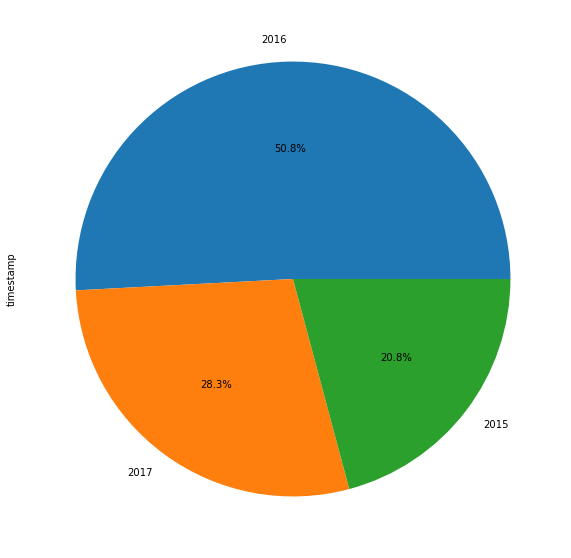

In [734]:
# Plot a visualization of the number of tweets by year
final_df['timestamp'].dt.year.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(20,10))

The page was more active in 2016 posting a total of 50.8% of tweets

#### 2: Are some dog types more pouplar than others?

<AxesSubplot:title={'center':'Dog Tweets Per Year'}, xlabel='Dog Stages', ylabel='Number of Tweets'>

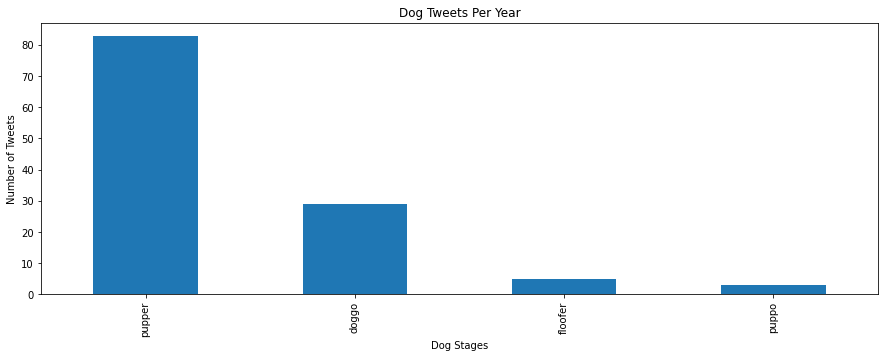

In [735]:
# Plot the dog type distribution in the final_df
final_df['dog_type'].value_counts().plot(kind='bar', figsize=(15,5), title='Dog Tweets Per Year', rot=90, xlabel='Dog Stages', ylabel='Number of Tweets')

Pupper is the common dog type owned

#### 3: What are the most common breed of dogs?

In [736]:
# Find the top 50 most common dog breeds
top_20_breeds = final_df['p1'].value_counts().sort_values(ascending=False).head(20)

<AxesSubplot:title={'center':'Top 20 Most Common Dog Breeds'}, xlabel='Dog Breeds', ylabel='Frequency'>

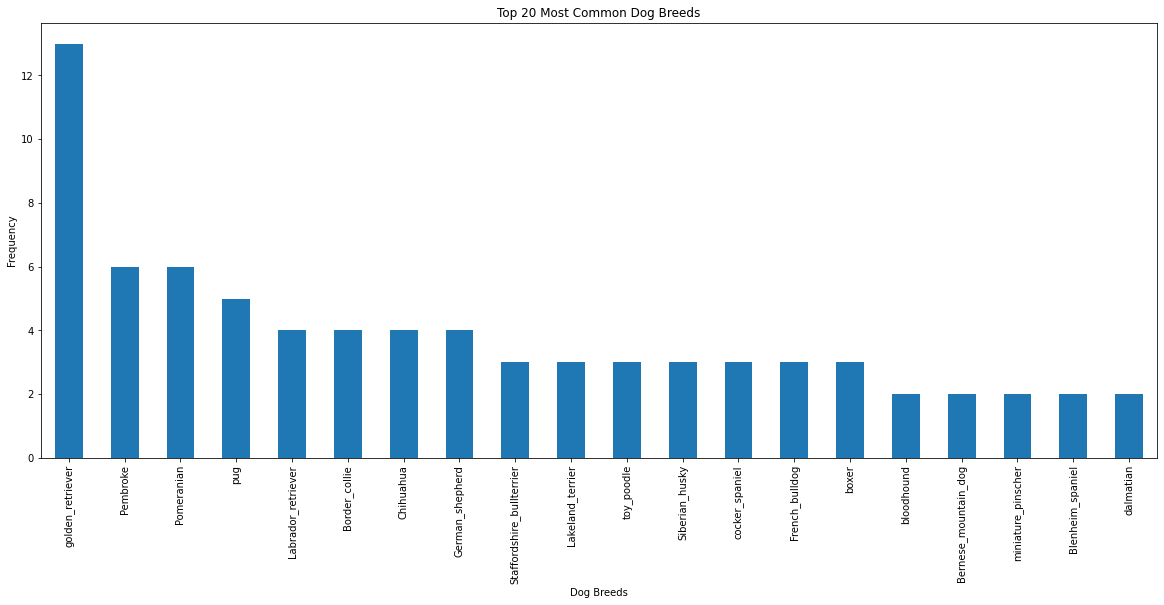

In [737]:
# Plot a bar chart of the top 50 most common dog breeds
top_20_breeds.plot(kind='bar',figsize=(20,8), title='Top 20 Most Common Dog Breeds', xlabel='Dog Breeds', ylabel='Frequency')

Golden Retriever is the most common dog breed, followed by pembroke

#### 4: What breed of dogs had the highest likes and and retweets?

In [738]:
# Breed of dogs with the most tweets
top10_tweets_breeds = final_df.sort_values(['retweet_count', 'favorite_count'], ascending=False)[['favorite_count', 'retweet_count', 'p1']].head(10)

In [739]:
top10_tweets_breeds['total_tweets'] = top10_tweets_breeds['favorite_count'] + top10_tweets_breeds['retweet_count']
top10_tweets_breeds

,favorite_count,retweet_count,p1,total_tweets
20,95450,42228,standard_poodle,137678
49,106827,32883,French_bulldog,139710
56,31800,17209,Pomeranian,49009
4,48410,13076,golden_retriever,61486
15,40325,11878,Great_Pyrenees,52203
12,38074,10706,Staffordshire_bullterrier,48780
0,32467,7711,Pembroke,40178
58,23302,7444,Pembroke,30746
66,24553,7126,Norwegian_elkhound,31679
10,26404,7031,Pomeranian,33435


<AxesSubplot:title={'center':'Top 10 Dogs with the most Tweets'}, xlabel='Dog Breeds', ylabel='Total Tweets'>

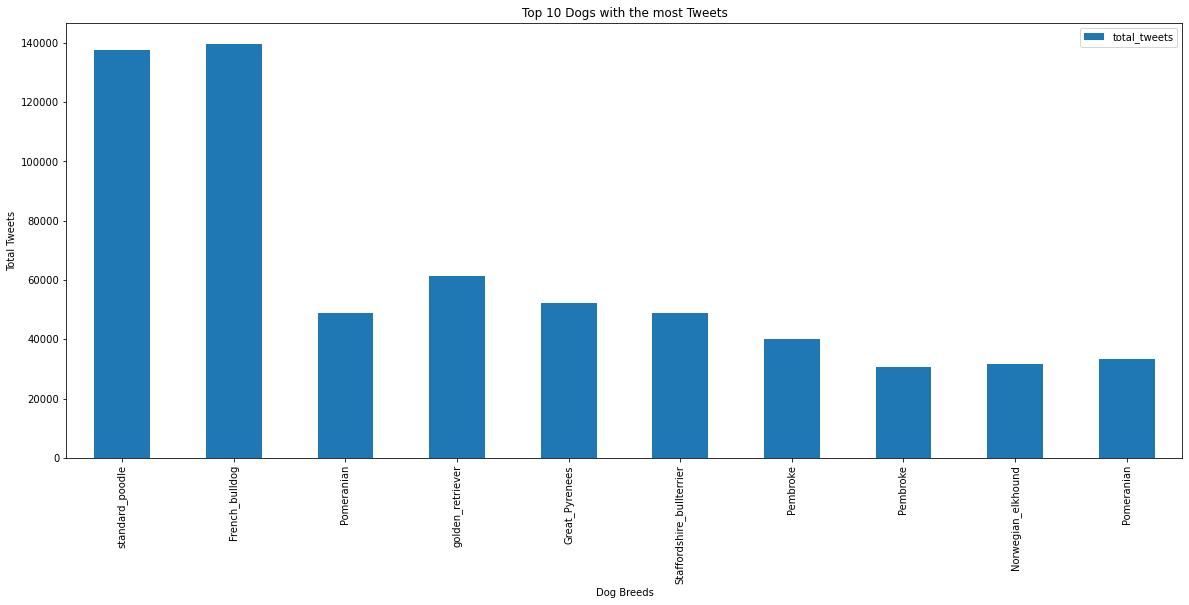

In [740]:

top10_tweets_breeds.plot(kind='bar', x='p1', y='total_tweets', figsize = (20, 8), xlabel='Dog Breeds', ylabel='Total Tweets', title='Top 10 Dogs with the most Tweets')

Standard Poodle had the highest average tweet

#### 5: What are the dogs with the highest rating?

In [741]:
# Get the average numerator ratings for each dog breed and get the top 20
breed_ratings = final_df.groupby('p1').mean()['ratings'].sort_values(ascending=False).head(20)

In [742]:
breed_ratings

p1
Bedlington_terrier         1.400000
standard_poodle            1.400000
Irish_setter               1.400000
curly-coated_retriever     1.300000
Dandie_Dinmont             1.300000
borzoi                     1.300000
Pembroke                   1.216667
chow                       1.200000
Old_English_sheepdog       1.200000
Shetland_sheepdog          1.200000
Irish_water_spaniel        1.200000
briard                     1.200000
wire-haired_fox_terrier    1.200000
French_bulldog             1.200000
vizsla                     1.200000
Eskimo_dog                 1.200000
komondor                   1.200000
Cardigan                   1.200000
golden_retriever           1.169231
Pomeranian                 1.166667
Name: ratings, dtype: float64

<AxesSubplot:title={'center':'Top 20 Dogs with the Highest Numerical Ratings'}, xlabel='Dog Breeds', ylabel='Ratings'>

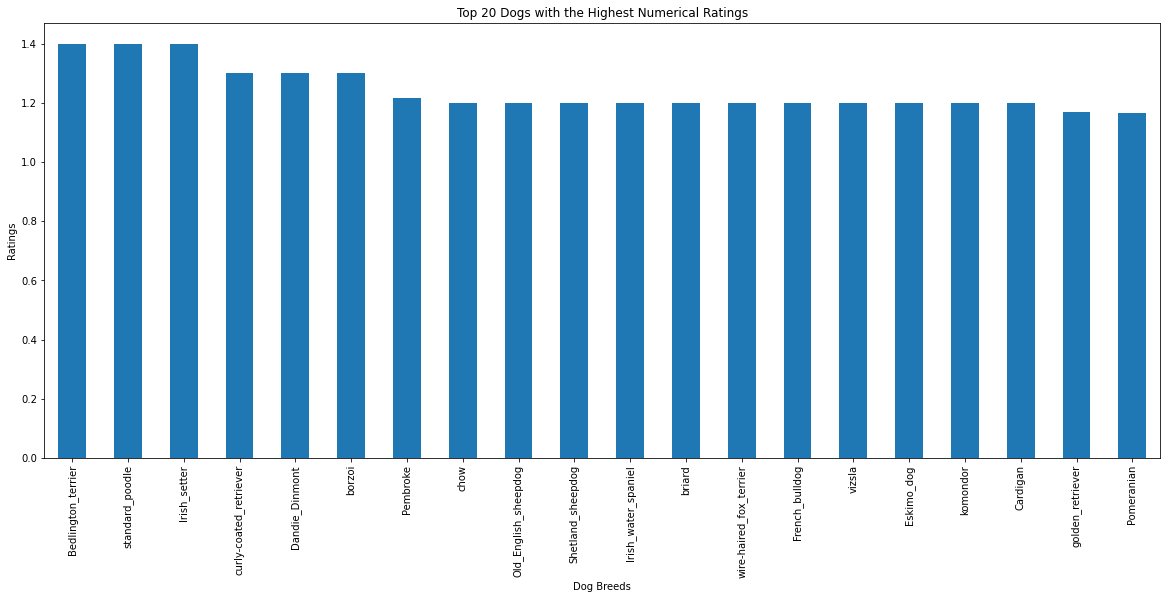

In [743]:
# Plot a bar chart of the top 10 dogs with the most numerical ratings
breed_ratings.plot(kind='bar', x='p1', y='ratings', figsize = (20, 8), xlabel='Dog Breeds', ylabel='Ratings', title='Top 20 Dogs with the Highest Numerical Ratings')

Bedlington Terriers and Standard Poodle were the dogs with the highest average numerical ratings

#### 6. What are the frequencies of the ratings?


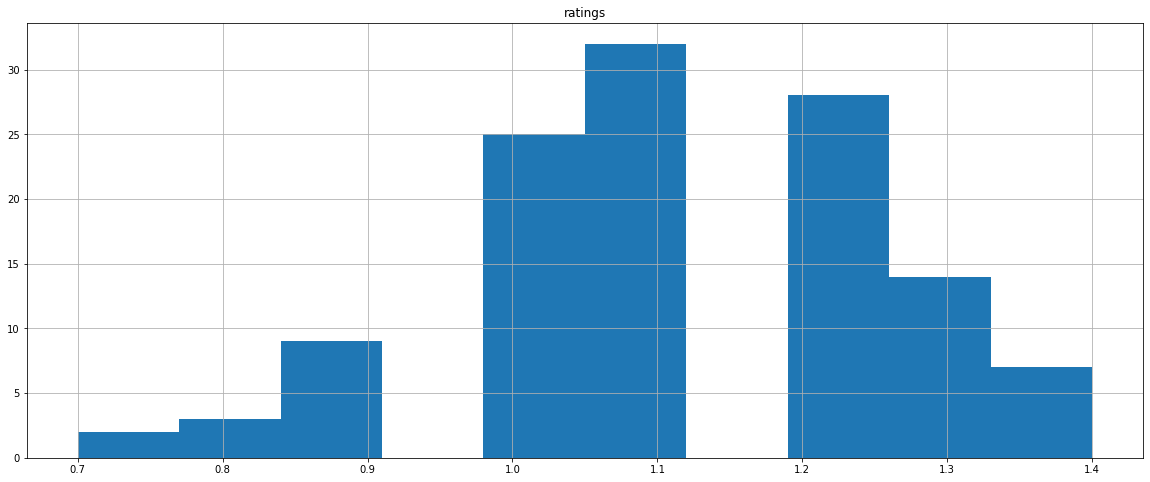

In [744]:
# Frequency of ratings by dog breed
final_df.hist(column='ratings', figsize=(20,8));

Most of the ratings are skewed to the right. This means more dogs were rated higher than 1.o than those rated lower

#### 7: The neural networks had the best performance or confidence on what breed of dogs?

In [745]:
# Check the average confidence level of the dog breeds classified by the model and get the top `20
model_confidence = final_df.groupby('p1').mean()['p1_conf'].sort_values(ascending=False).head(20)

In [746]:
model_confidence

p1
Old_English_sheepdog              0.999715
Bernese_mountain_dog              0.977165
komondor                          0.974781
Samoyed                           0.950053
clumber                           0.946718
German_short-haired_pointer       0.935771
dalmatian                         0.911592
French_bulldog                    0.878647
Labrador_retriever                0.860593
pug                               0.851986
American_Staffordshire_terrier    0.810158
Great_Pyrenees                    0.807354
Pomeranian                        0.794941
papillon                          0.772894
German_shepherd                   0.771459
Shetland_sheepdog                 0.759907
borzoi                            0.742912
whippet                           0.739367
miniature_pinscher                0.736174
curly-coated_retriever            0.733256
Name: p1_conf, dtype: float64

<AxesSubplot:title={'center':'Top 20 Dogs with the Highest Classification Accuracy'}, xlabel='Dog Breeds', ylabel='Confidence Level'>

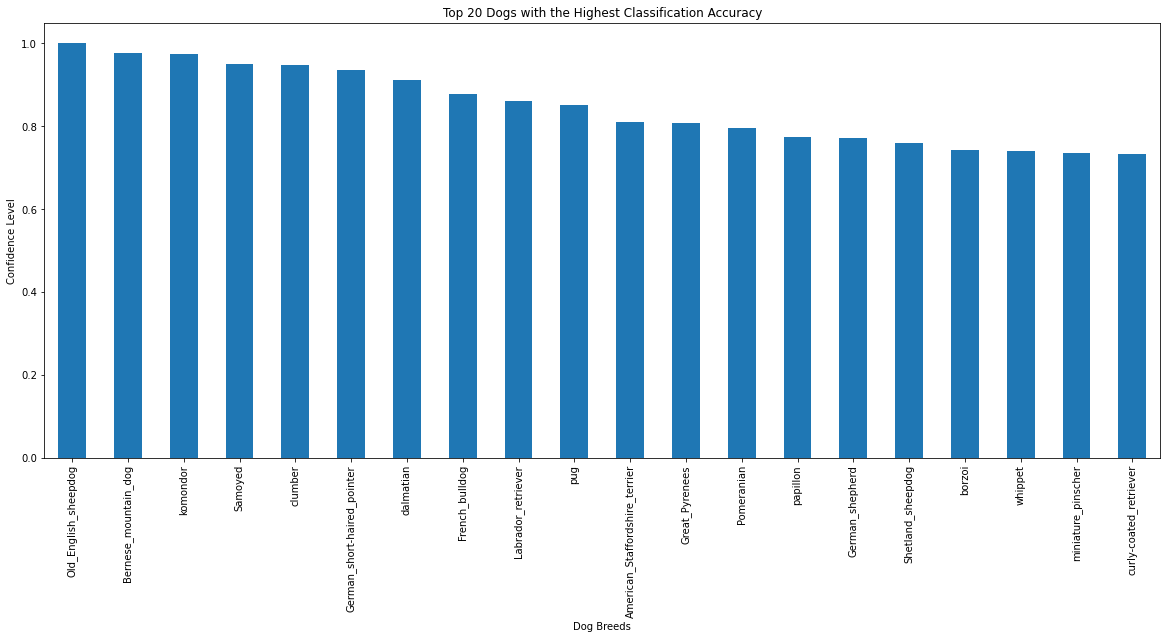

In [747]:
# Plot a bar chart of the top 10 dogs with the highest confidence level
model_confidence.plot(kind='bar', x='p1', y='p1_conf', figsize = (20, 8), xlabel='Dog Breeds', ylabel='Confidence Level', title='Top 20 Dogs with the Highest Classification Accuracy')

It is clear that the performance of the model were the most accurate in detecting in Old English Sheepdog, Bernese Mountain Dog and Komodors

### 8: What is the relatosnhip between likes and retweets

<AxesSubplot:title={'center':'Retweets vs. Favorite Count'}, xlabel='favorite_count', ylabel='retweet_count'>

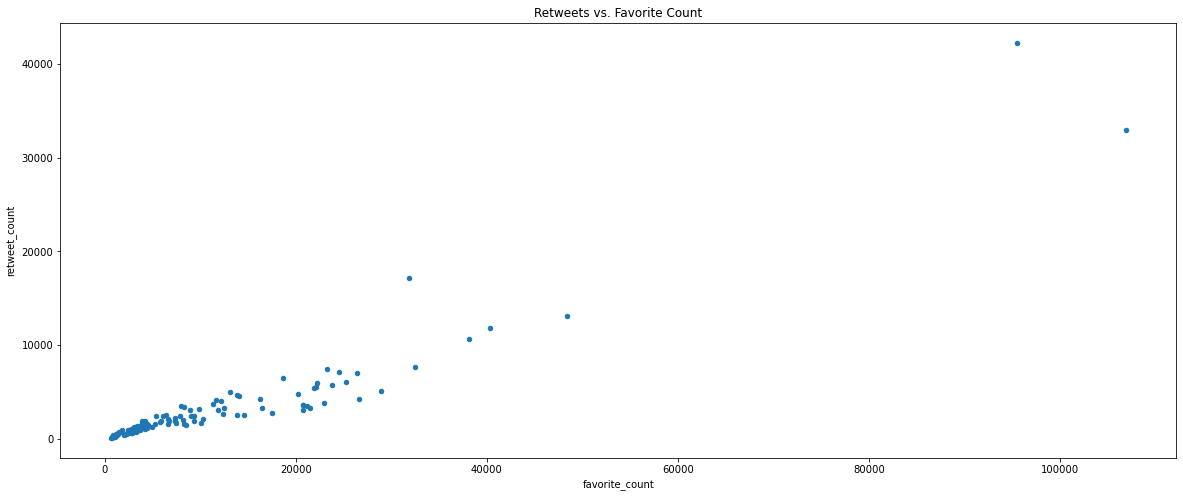

In [748]:
# Plot a scatter diagram of the retweets and favorite count
final_df.plot(kind='scatter', x='favorite_count', y='retweet_count', figsize=(20,8), title='Retweets vs. Favorite Count')

#### 9: What is the general correlations between variables?

In [749]:
# Generate a correlation matrix of the variables in the final_df
corr = final_df.corr()
corr

,tweet_id,ratings,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
tweet_id,1.000000,0.708668,0.085803,0.080184,-0.053676,0.438309,0.619804
ratings,0.708668,1.000000,0.041220,0.032937,0.043349,0.452124,0.536060
p1_conf,0.085803,0.041220,1.000000,-0.534703,-0.712839,0.011879,0.052867
p2_conf,0.080184,0.032937,-0.534703,1.000000,0.418199,0.056576,0.054001
p3_conf,-0.053676,0.043349,-0.712839,0.418199,1.000000,-0.041398,-0.067722
retweet_count,0.438309,0.452124,0.011879,0.056576,-0.041398,1.000000,0.946332
favorite_count,0.619804,0.536060,0.052867,0.054001,-0.067722,0.946332,1.000000


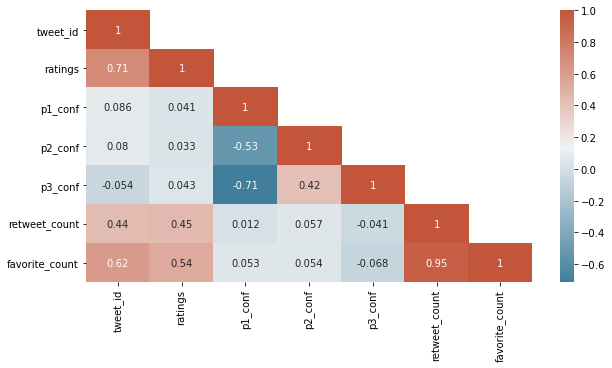

In [750]:
# Correlation between different variables
f, ax = plt.subplots(figsize=(10, 5))
# Create a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool, ), k=1)
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Plot the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap);

### 10. What is the trend of the average ratings over the years?

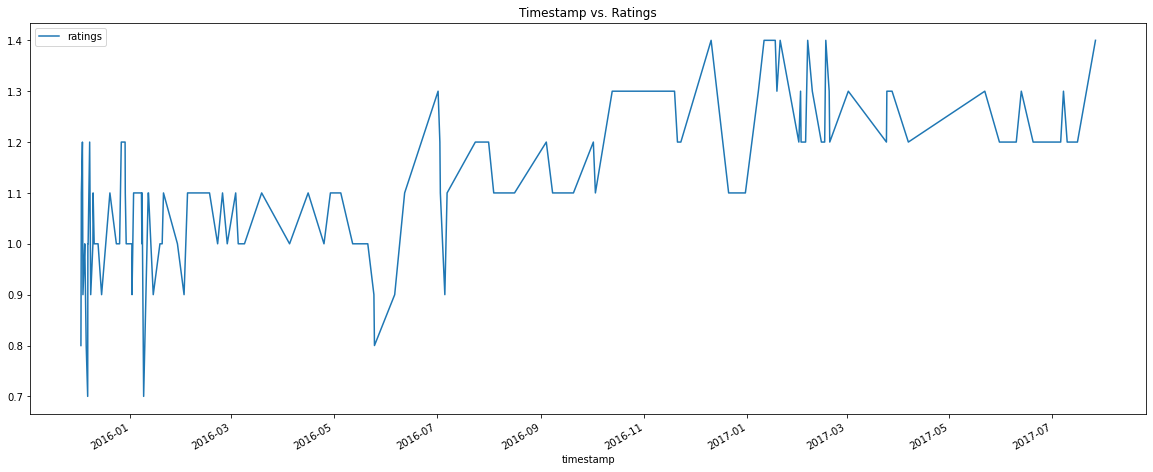

In [751]:
# Plot a trend line for timestamp and rating
final_df.plot(kind='line', x='timestamp', y='ratings', figsize=(20,8), title='Timestamp vs. Ratings');

The average rating has seen an upward trend over the years

## Insights:
1. From Q1, it shows the WeRateDog twitter page was more active in 2016 with 50.8% of the gathered tweets

2. Among the dog stages, pupper seems to be the most common having 50 more values than the second one of doggo

3. In the Top 20 Most Common Breeds, Golden Retriever was number 1

4. Standard Poodle and French Bulldog seems to be the dogs with the most cumulative tweets

5. Bedlington Terrier, Standard Poodle and Irish Setter were the dogs with the highest average ratings

6. The average rating is skewed to the right as more dogs had more than 1.0 ratings than less.

7. The image classification model had the best accuracies in identifying Old English Sheepdog(99%), Bernese Mountain Dog(98%)
and Komondor (97%)

8. In terms of correlations of the different variables in the final dataframe, the strongest is between retweet count and favorite count( understably so). Similarly, the confidence level of the model in p1_conf and p3_conf was 71% correlated. This shows that the model had great performance even in p2.
9. The average numerical rating is skewed to the right. More dogs had more than 1.0 rating than less
10. The average numerical rating has seen an upwards trend over the years